# Nontrivial Decomposition

This chapter will discuss the cases where component peaks are not apparent.

## Initial Observation

Let us first observe such an example.

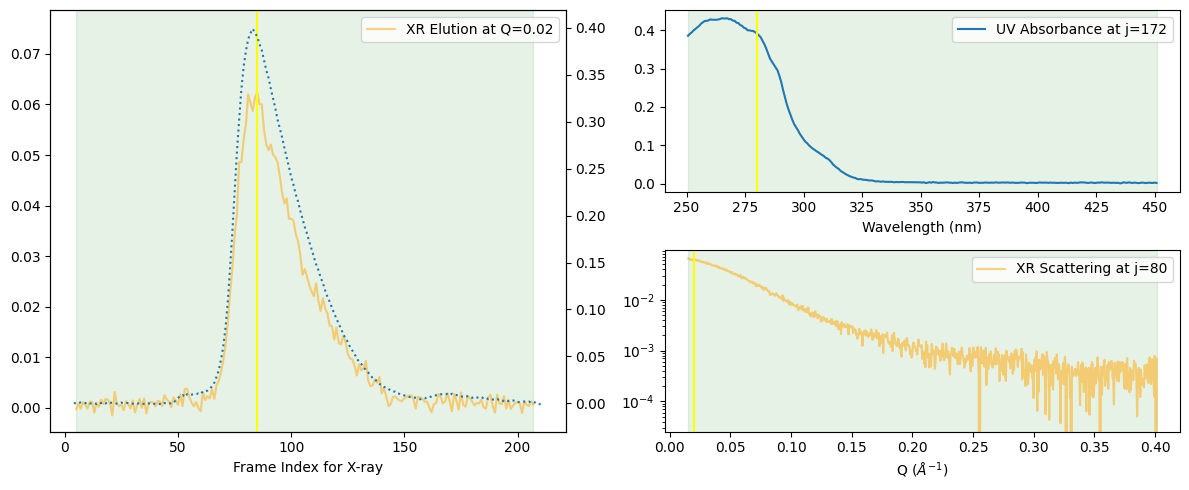

In [1]:
from molass import get_version
assert get_version() >= '0.6.0', "This tutorial requires molass version 0.6.0 or higher."
from molass_data import get_version
assert get_version() >= '0.3.0', "This tutorial requires molass_data version 0.3.0 or higher."
from molass_data import SAMPLE4
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE4)
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
corrected_ssd.plot_compact();

At first glance, the peak may seem to consist of a single component. For a more detailed observation, let us assume it may consist of two components and add the Rg curve.  

100%|██████████| 203/203 [00:04<00:00, 50.30it/s] 
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


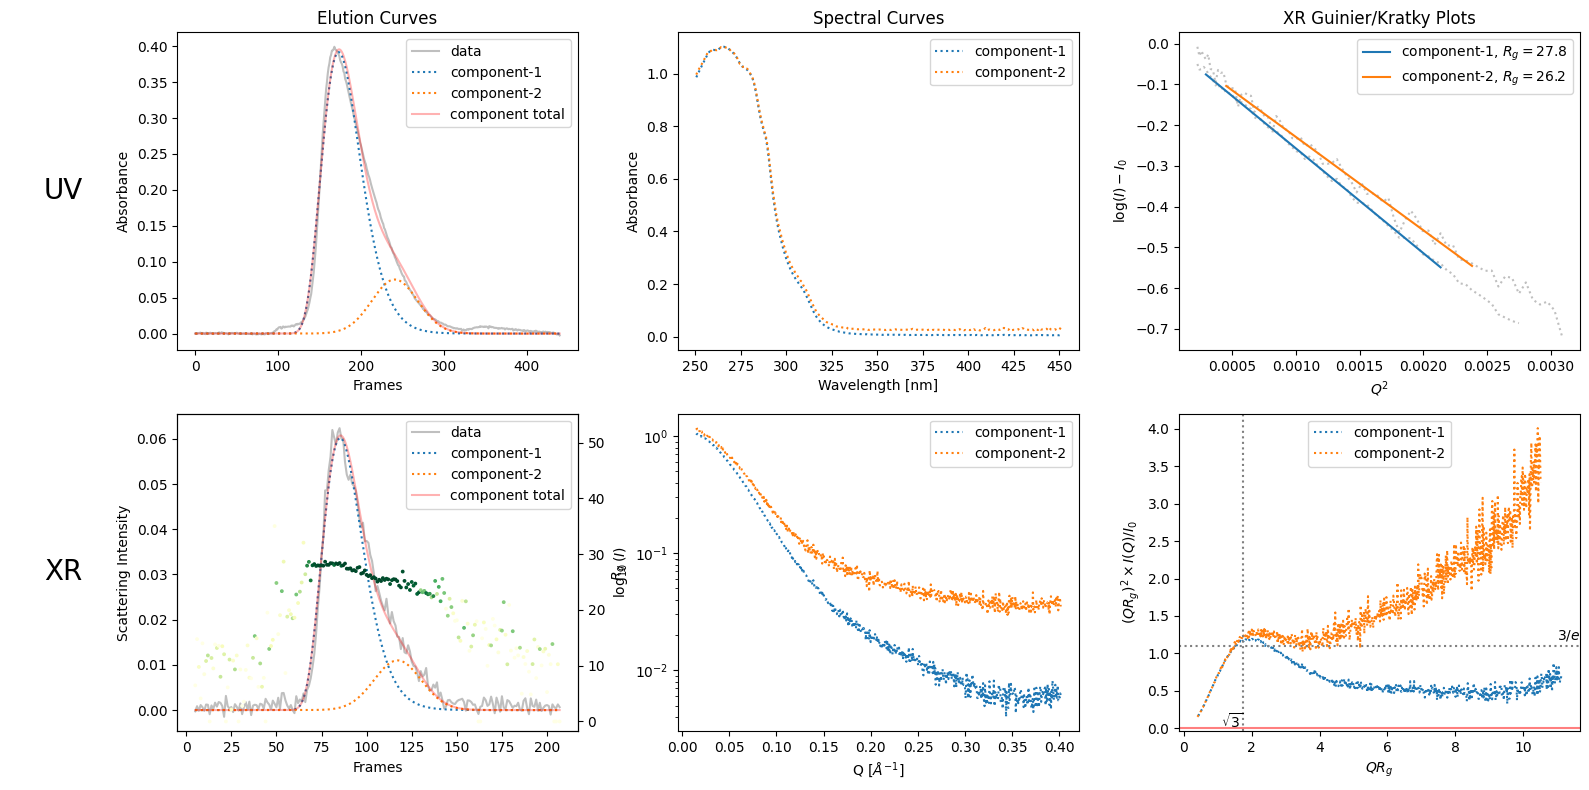

In [2]:
rgcurve = corrected_ssd.xr.compute_rgcurve()
decomposition = corrected_ssd.quick_decomposition(num_components=2)
decomposition.plot_components(rgcurve=rgcurve)

## Varied Binary Proportions

If you are not sure about the default compositiun, you can compare the results with different proportions as follows.

In [3]:
import numpy as np
num_trails = 8
species1_proportions = np.ones(num_trails) * 3
species2_proportions = np.linspace(1, 3, num_trails)
proportions = np.array([species1_proportions, species2_proportions]).T
proportions

array([[3.        , 1.        ],
       [3.        , 1.28571429],
       [3.        , 1.57142857],
       [3.        , 1.85714286],
       [3.        , 2.14285714],
       [3.        , 2.42857143],
       [3.        , 2.71428571],
       [3.        , 3.        ]])

D:\Github\molass-library\molass\Decompose\VaryUtils.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


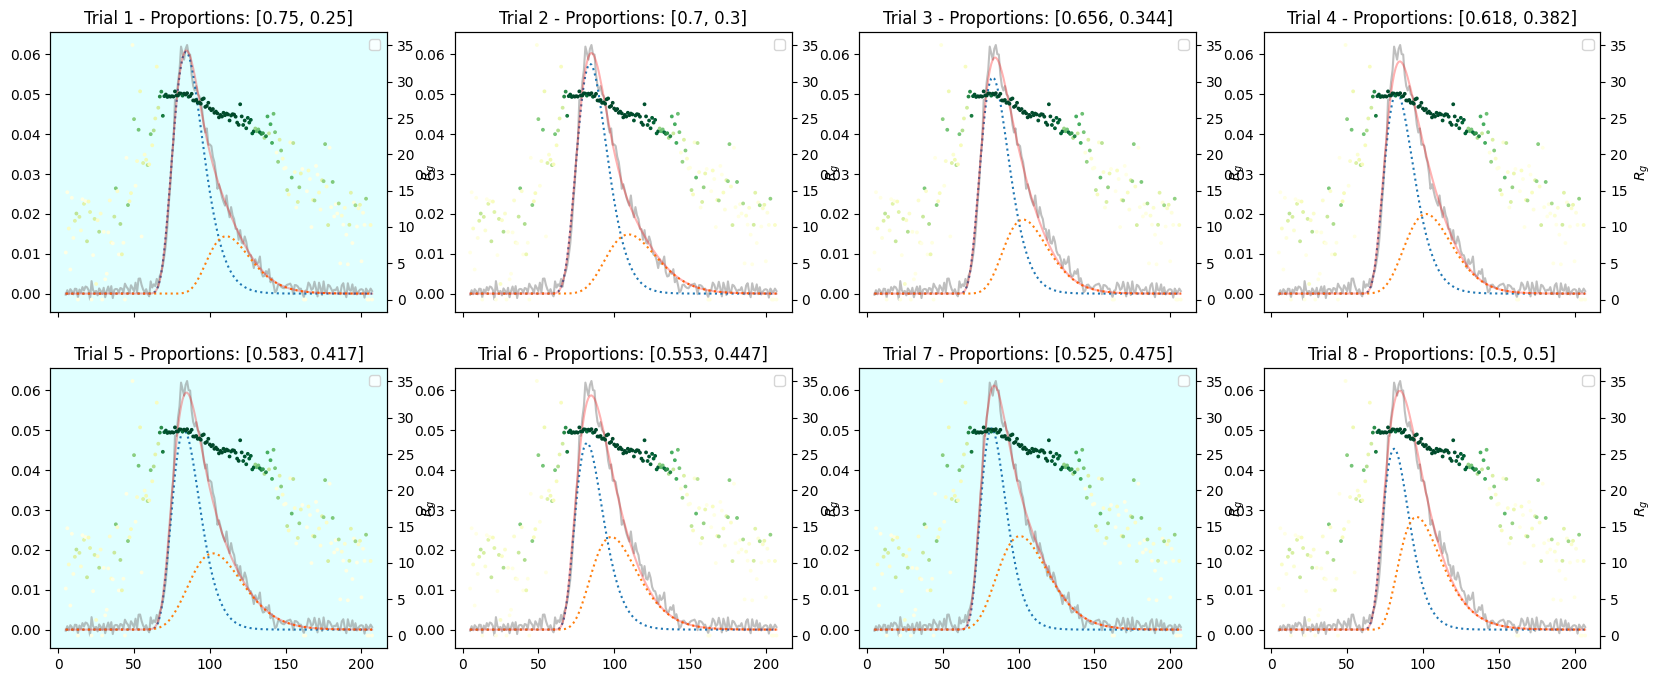

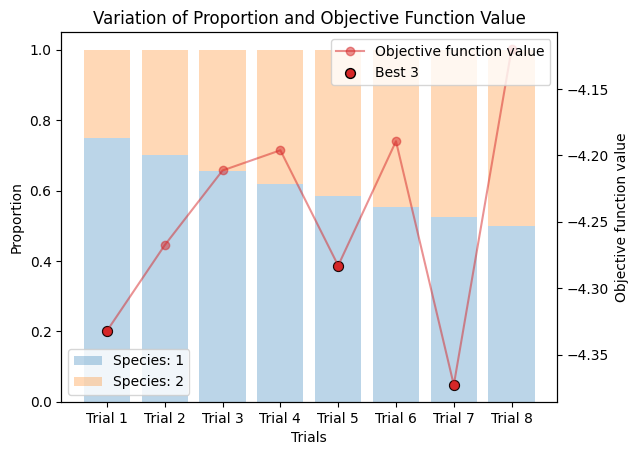

In [4]:
corrected_ssd.plot_varied_decompositions(proportions, rgcurve=rgcurve, best=3)

## Varied Tertiary Proportions

If the existence of three components are suspected, do as follows.

In [5]:
species3_proportions = np.ones(num_trails) * 1
proportions = np.array([species1_proportions, species2_proportions, species3_proportions]).T
proportions


array([[3.        , 1.        , 1.        ],
       [3.        , 1.28571429, 1.        ],
       [3.        , 1.57142857, 1.        ],
       [3.        , 1.85714286, 1.        ],
       [3.        , 2.14285714, 1.        ],
       [3.        , 2.42857143, 1.        ],
       [3.        , 2.71428571, 1.        ],
       [3.        , 3.        , 1.        ]])

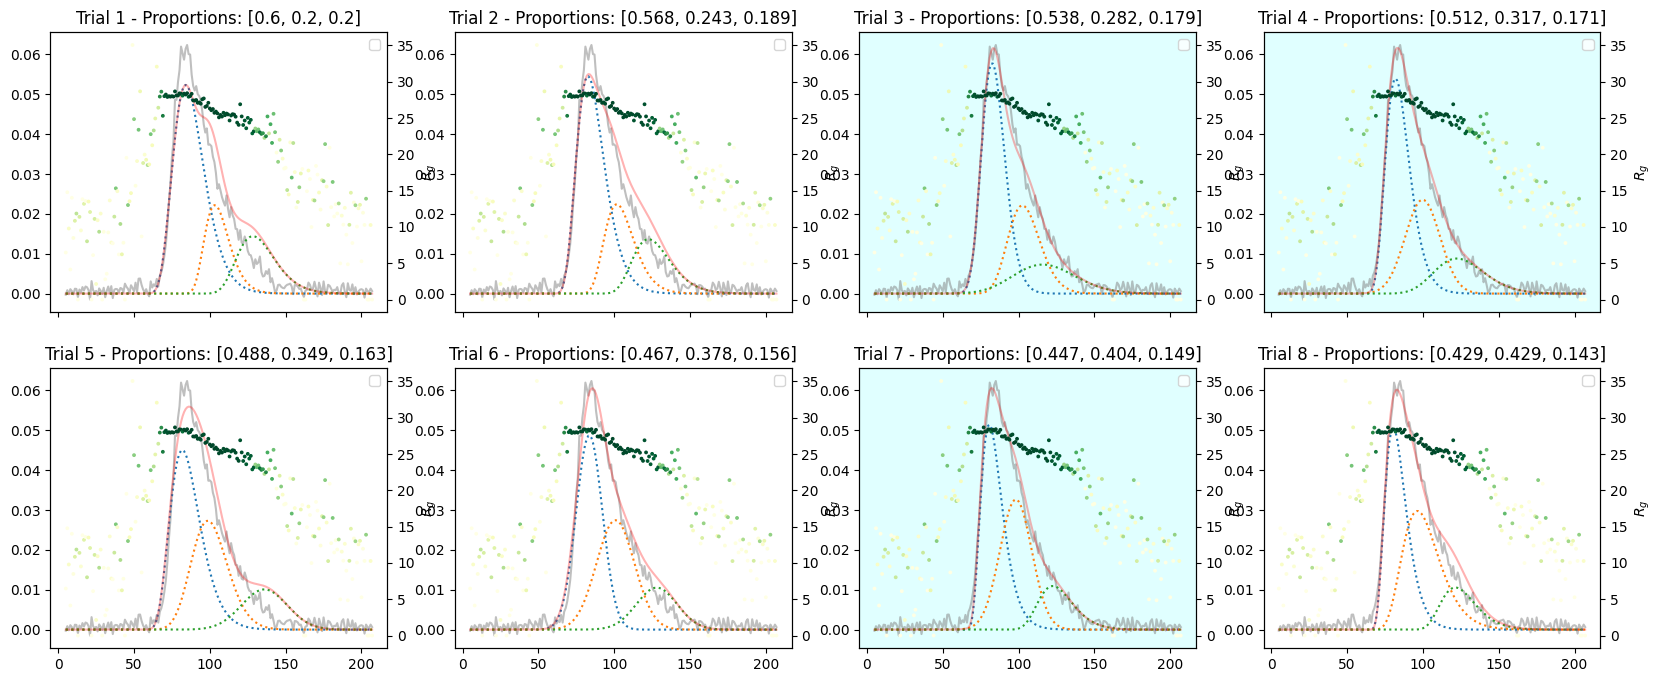

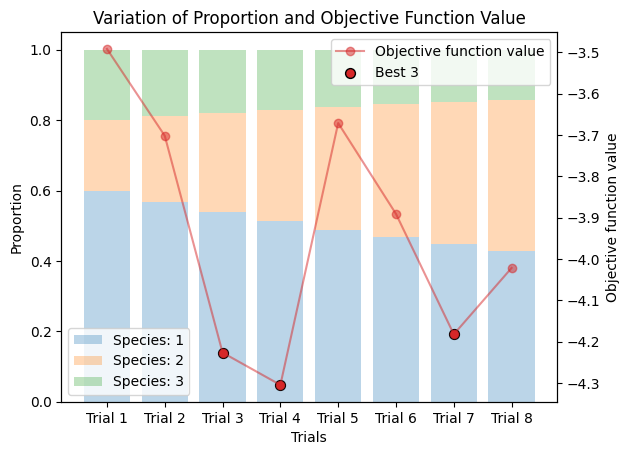

In [6]:
corrected_ssd.plot_varied_decompositions(proportions, rgcurve=rgcurve, best=3)